In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("Jamboree_Admission.csv")

# Problem Statement

The objective of this study is to analyze the key factors influencing graduate admissions and examine their interrelationships. By conducting this analysis, we aim to provide Jamboree with 
- valuable insights into the determinants of graduate admissions
- shedding light on the importance and relationships among various variables.
- our analysis will facilitate the development of a predictive model that can estimate an individual's likelihood of admission based on their academic and personal attributes
- ultimately aiding both applicants and admissions committees in making more informed decisions.

# EDA

In [3]:
df.shape

(500, 9)

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isna().sum() # no nulls

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df[df.duplicated()].shape # no duplicate rows

(0, 9)

In [8]:
df.drop(columns=["Serial No."],inplace = True)

In [9]:
df.rename(columns={"Chance of Admit ":"Chance of Admit","LOR ":"LOR"},inplace=True)

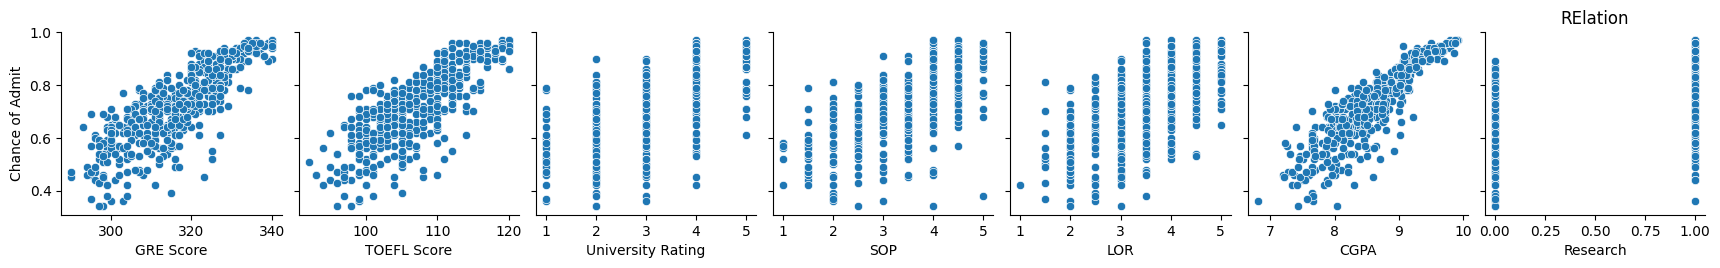

In [10]:
sns.pairplot(df,x_vars=df.loc[:,df.columns[:-1]],y_vars="Chance of Admit")
plt.title("RElation")
plt.show()

- Exam scores (GRE, TOEFL and CGPA) correlate highly positively with the chance of admission.
- While university ranking, rating of SOP, and LOR also have an impact on chances of admit, research is the only variable that doesn't have much of an impact.
- Research is a categorical column or rather, a boolean data type.
- University rating, SOP, and LDR must be converted to Category.

In [11]:
df[["University Rating","SOP","LOR"]] = df[["University Rating","SOP","LOR"]].astype("category")
df["Research"] = df.Research.astype("bool")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    bool    
 7   Chance of Admit    500 non-null    float64 
dtypes: bool(1), category(3), float64(2), int64(2)
memory usage: 18.6 KB


## Correlation(Target V/s Numerical variables)

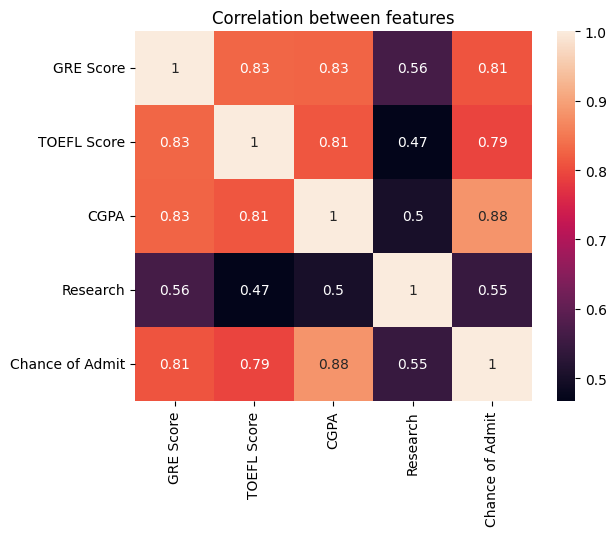

In [12]:
heat = df.corr(numeric_only=True)

sns.heatmap(heat,annot=True)
plt.title("Correlation between features")
plt.show()

**The heatmap shows that *CGPA, GRE, TOEFL* have a strong positive correlation with chance of admission**

## Target V/s Categorical variables

In [13]:
def box_plot(df,cols):
    plt.figure(figsize=(10,10))
    target = "Chance of Admit"
    # plt.subplot(2,2)
    # plot_df = df[cols]
    # i = plot_df.shape
    for i in range(len(cols)):
        ax = plt.subplot(len(cols)//2,len(cols)//2,i+1)
        sns.boxplot(data = df,x = cols[i],y=target)
        plt.title(f"{cols[i]} v/s Chance of Admission",fontsize=11)
        
    plt.show()

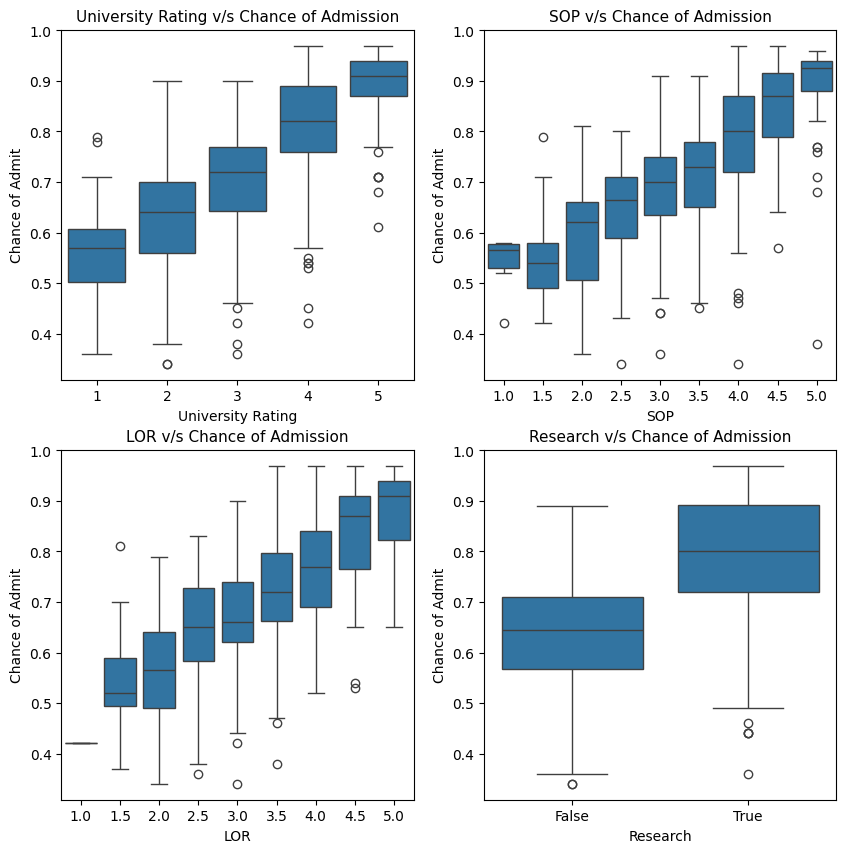

In [14]:
cat_columns = df.select_dtypes(include=["bool","object","category"]).columns.to_list()
cat_columns


box_plot(df,cat_columns)

**The categorical variables also increase the chances of admission.**

## Distribution Plots for numerical

In [15]:
def custom_plot(df,cols,type="categorical"):
    plt.figure(figsize=(10,10))
    # plt.subplot(2,2)
    # plot_df = df[cols]
    # i = plot_df.shape
    if type.lower() == "numerical":
        for i in range(len(cols)):
            ax = plt.subplot(len(cols)//2,len(cols)//2,i+1)
            sns.histplot(data = df,x = cols[i],kde=True)
    elif type.lower() == "categorical":
        for i in range(len(cols)):
            ax = plt.subplot(len(cols)//2,len(cols)//2,i+1)
            sns.countplot(data = df,x = cols[i])
    plt.show()

In [16]:
num_cols = df.select_dtypes(include = ["int","float"]).columns.to_list()
num_cols

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

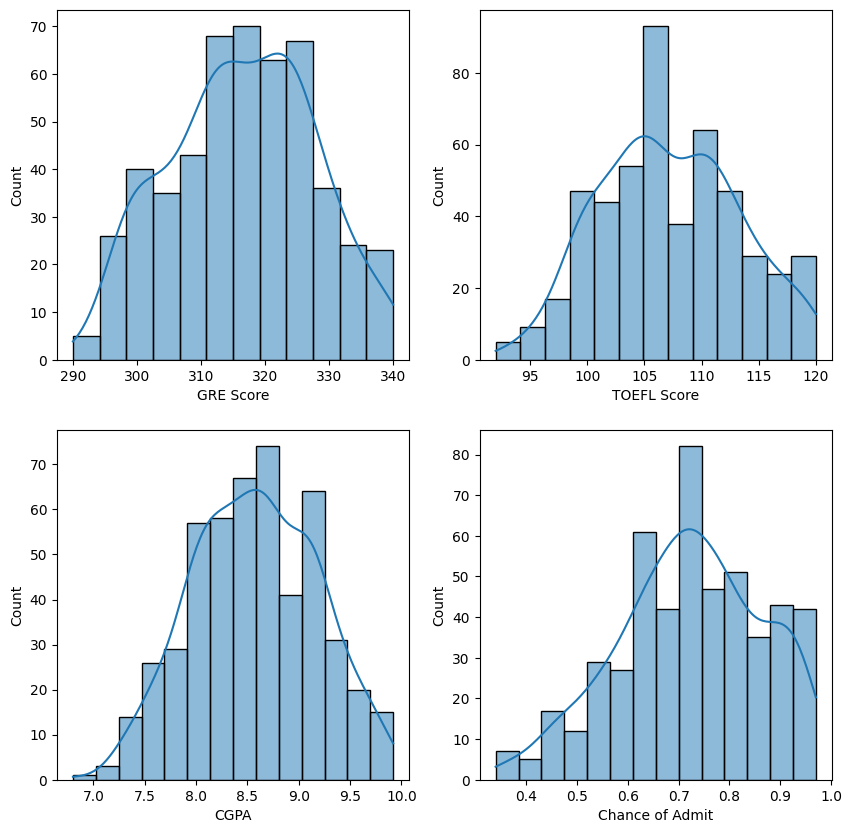

In [17]:
custom_plot(df,num_cols,"numerical")

- GRE scores are between 290 and 340, with maximum students scoring in the range 315-320.
- TOEFL scores are between 90 and 120, with maximum students scoring around 105.
- CGPA ranges between 7 and 10, with maximum students scoring around 8.
- Chance of Admitage between 0 and 1, with maximum students scoring around 0.7 - 0.75 i.e., 70-75 percentage. 

## Distribution Plots for categorical

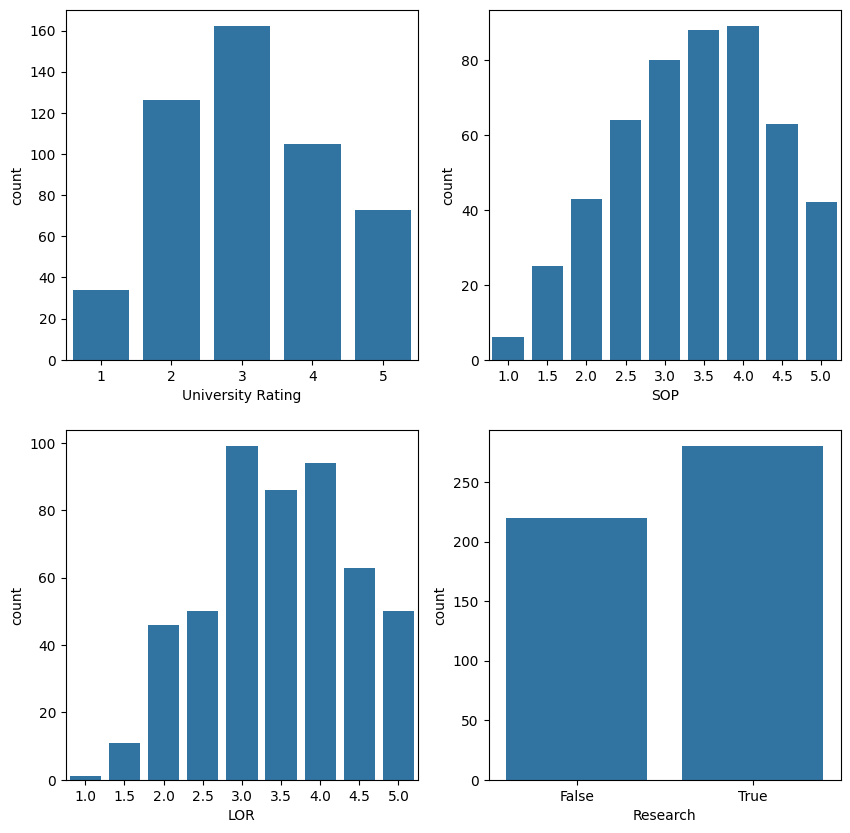

In [18]:
custom_plot(df,cat_columns,"categorical")

- The max count of University Rating is 3
- The max count of SOP is 4 however 3.5 is very close to the max count as well
- The max count of LOR is 3 and 4 is very close to the max count
- Most of them are from a research background

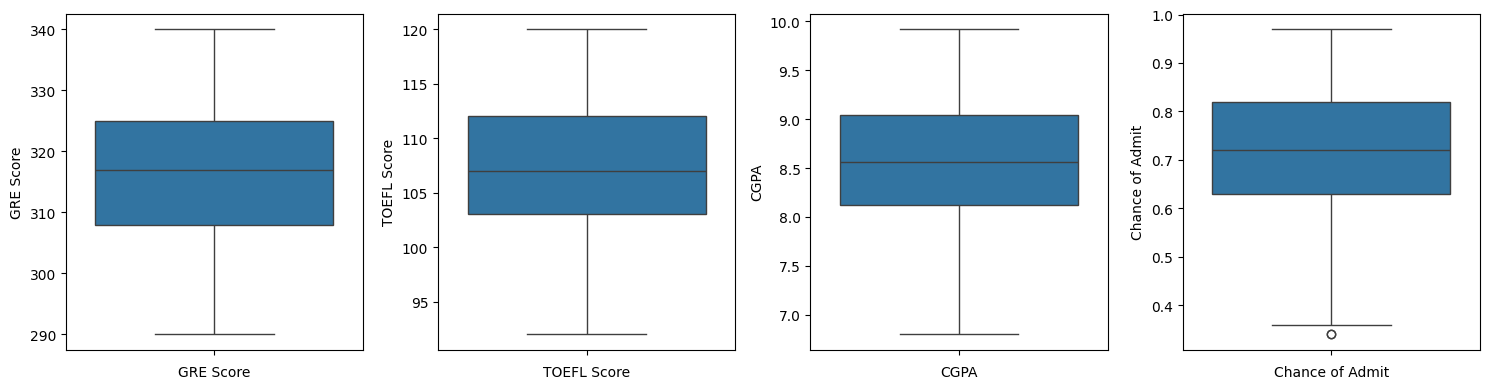

In [19]:
plt.figure(figsize=(15,4))
for i in range(len(num_cols)):
    ax = plt.subplot(1,4,i+1)
    sns.boxplot(y= df[num_cols[i]])
    plt.xlabel(num_cols[i])
plt.tight_layout()
plt.show()

**We see that there are no outliers in the numerical columns.**

# Preprocessing

In [20]:
x = df.loc[:,df.columns[:-1]]


y = df.loc[:,df.columns[-1]]

## Split Data Types

In [21]:
numerical = x[num_cols[:-1]]

categorical = x[cat_columns]

In [22]:
numerical

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21
...,...,...,...
495,332,108,9.02
496,337,117,9.87
497,330,120,9.56
498,312,103,8.43


## Preprocess Numerical Data: Applying MinMax scaling

In [23]:
MinMax= MinMaxScaler()
x_num = MinMax.fit_transform(numerical)

x_num = pd.DataFrame(data = x_num,columns=numerical.columns)

x_num

,GRE Score,TOEFL Score,CGPA
0,0.94,0.928571,0.913462
1,0.68,0.535714,0.663462
2,0.52,0.428571,0.384615
3,0.64,0.642857,0.599359
4,0.48,0.392857,0.451923
...,...,...,...
495,0.84,0.571429,0.711538
496,0.94,0.892857,0.983974
497,0.80,1.000000,0.884615
498,0.44,0.392857,0.522436


## Preprocess Categorical Data: label encoding 

In [24]:
categorical

,University Rating,SOP,LOR,Research
0,4,4.5,4.5,True
1,4,4.0,4.5,True
2,3,3.0,3.5,True
3,3,3.5,2.5,True
4,2,2.0,3.0,False
...,...,...,...,...
495,5,4.5,4.0,True
496,5,5.0,5.0,True
497,5,4.5,5.0,True
498,4,4.0,5.0,False


In [25]:
label_encoder = {}
for i in cat_columns:
    label_encoder[i]=LabelEncoder()
    categorical[i]=label_encoder[i].fit_transform(categorical[i])

C:\Users\Asus\AppData\Local\Temp\ipykernel_16912\493826581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=label_encoder[i].fit_transform(categorical[i])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16912\493826581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical[i]=label_encoder[i].fit_transform(categorical[i])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16912\493826581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [26]:
label = LabelEncoder()
categorical

,University Rating,SOP,LOR,Research
0,3,7,7,1
1,3,6,7,1
2,2,4,5,1
3,2,5,3,1
4,1,2,4,0
...,...,...,...,...
495,4,7,6,1
496,4,8,8,1
497,4,7,8,1
498,3,6,8,0


In [27]:
x_cat=MinMax.fit_transform(categorical)

In [28]:
x_cat =pd.DataFrame(data=x_cat,columns=categorical.columns) 

In [29]:
x_cat

,University Rating,SOP,LOR,Research
0,0.75,0.875,0.875,1.0
1,0.75,0.750,0.875,1.0
2,0.50,0.500,0.625,1.0
3,0.50,0.625,0.375,1.0
4,0.25,0.250,0.500,0.0
...,...,...,...,...
495,1.00,0.875,0.750,1.0
496,1.00,1.000,1.000,1.0
497,1.00,0.875,1.000,1.0
498,0.75,0.750,1.000,0.0


In [30]:
x_processed = pd.concat([x_num,x_cat],axis=1)

In [31]:
x_processed.head()

,GRE Score,TOEFL Score,CGPA,University Rating,SOP,LOR,Research
0,0.94,0.928571,0.913462,0.75,0.875,0.875,1.0
1,0.68,0.535714,0.663462,0.75,0.750,0.875,1.0
2,0.52,0.428571,0.384615,0.50,0.500,0.625,1.0
3,0.64,0.642857,0.599359,0.50,0.625,0.375,1.0
4,0.48,0.392857,0.451923,0.25,0.250,0.500,0.0


In [32]:
x_processed.shape

(500, 7)

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_processed,y,test_size=0.2,random_state=10)

print("x_train ",x_train.shape,"\ny_train ",y_train.shape,"\nx_test ",x_test.shape,"\ny_test ",y_test.shape)

x_train  (400, 7) 
y_train  (400,) 
x_test  (100, 7) 
y_test  (100,)


# Model building

In [34]:
model = LinearRegression()

results=model.fit(x_train,y_train)

In [35]:
y_pred = results.predict(x_test)

pd.DataFrame({"y actual":y_test,"y predicted":y_pred}).reset_index(drop=True)

,y actual,y predicted
0,0.94,0.908873
1,0.91,0.903533
2,0.80,0.767776
3,0.90,0.848666
4,0.77,0.716814
...,...,...
95,0.76,0.683747
96,0.75,0.755637
97,0.94,0.953845
98,0.44,0.509416


In [36]:
display=pd.DataFrame(index=[x_processed],data = results.coef_,columns=["Coefficients/Weights"])
display

C:\Users\Asus\AppData\Local\Temp\ipykernel_16912\1426328071.py:1: DeprecationWarning: DataFrame._data is deprecated and will be removed in a future version. Use public APIs instead.
  display=pd.DataFrame(index=[x_processed],data = results.coef_,columns=["Coefficients/Weights"])


,Coefficients/Weights
GRE Score,0.119166
TOEFL Score,0.050961
CGPA,0.363873
University Rating,0.020489
SOP,0.024040
LOR,0.060161
Research,0.021928


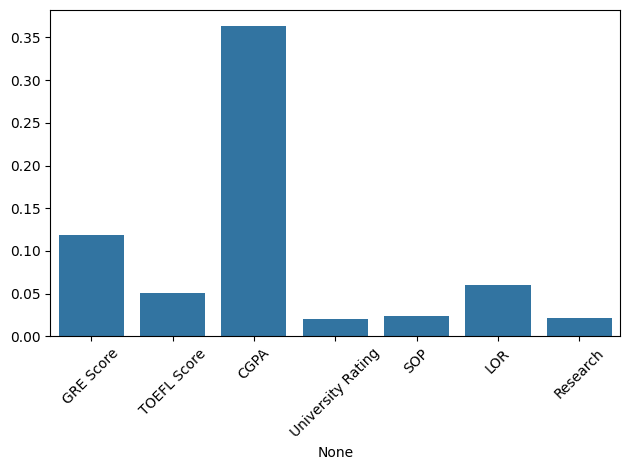

In [37]:
sns.barplot(y=results.coef_,x=x_processed.columns,orient="v")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

# Testing the assumptions of linear regression model 

## Multicolinearity Check

In [38]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif

,Variable,VIF
0,GRE Score,27.633904
1,TOEFL Score,28.537695
2,CGPA,40.458224
3,University Rating,10.617599
4,SOP,18.447595
5,LOR,14.252869
6,Research,3.431244


**We see that almost all the variables have a very high level of colinearity excluding Research.**

## Mean of Residuals

In [39]:
residuals = y_test.values - y_pred
residuals.reshape((-1,))
print('Mean of Residuals: ', residuals.mean())

Mean of Residuals:  -0.0007921392172393327


**Since the mean of residuals is very close to 0, we can say that the model is unbiased**

## Linearity of variables 

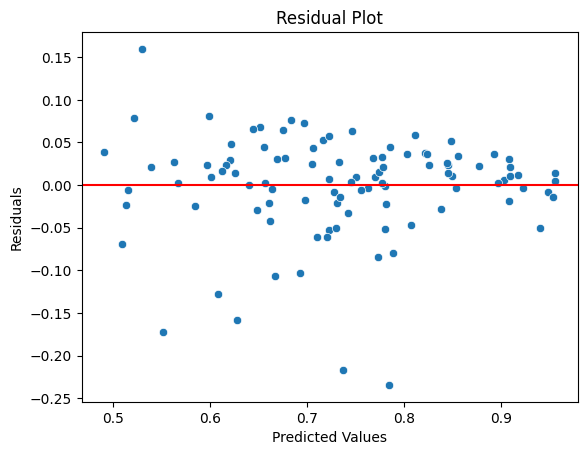

In [40]:
sns.scatterplot(x = y_pred.reshape((-1,)), y=residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
plt.show();

**Since the residual plot shows no discernible pattern, we can conclude that linearity of variables exists**

## Homoscedasticity

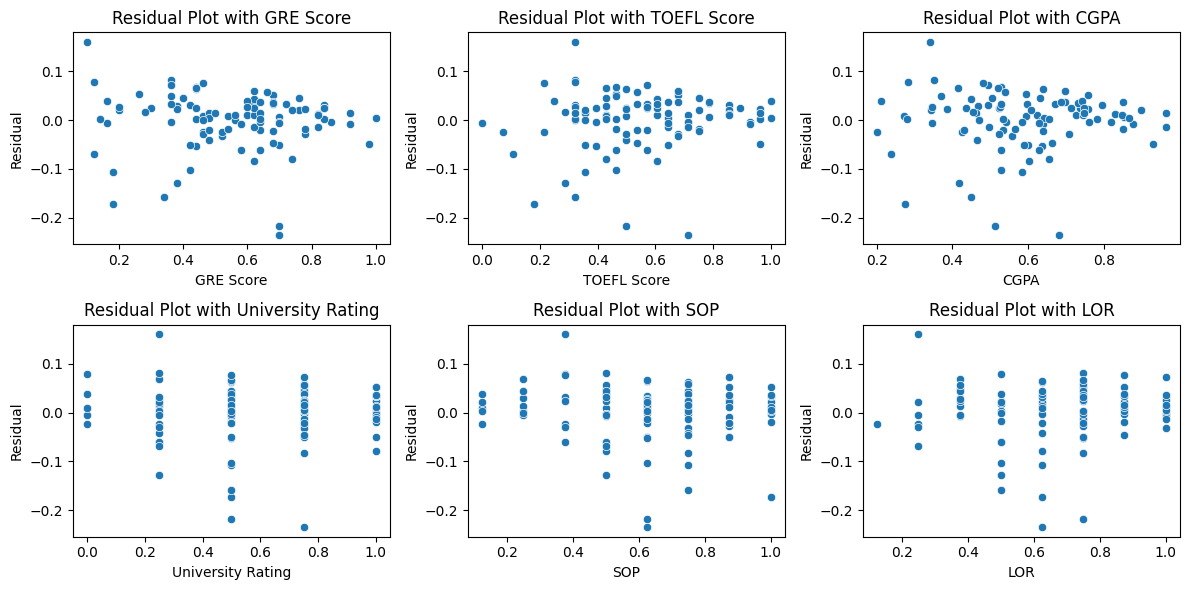

In [41]:
plt.figure(figsize=(12,6))
i=1
for col in x_test.columns[:-1]:
  ax = plt.subplot(2,3,i)
  sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)))
  plt.title(f'Residual Plot with {col}')
  plt.xlabel(col)
  plt.ylabel('Residual')
  i+=1

plt.tight_layout()
plt.show();

**We can infer that homoscedasticity is satisfied since there is no substantial variation in the spread of residuals concerning changes in the independent variables.**

## Normality of Residuals

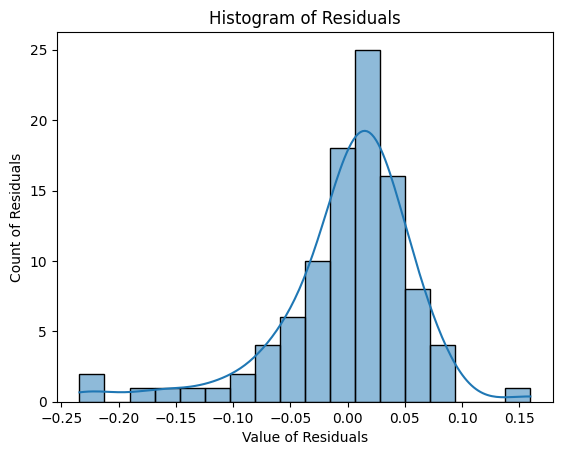

In [42]:
sns.histplot(residuals.reshape((-1,)), kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Value of Residuals')
plt.ylabel('Count of Residuals')
plt.show();

**The histogram shows that there is a left skew in the distribution of residuals but it is close to a normal distribution**

### qq plot

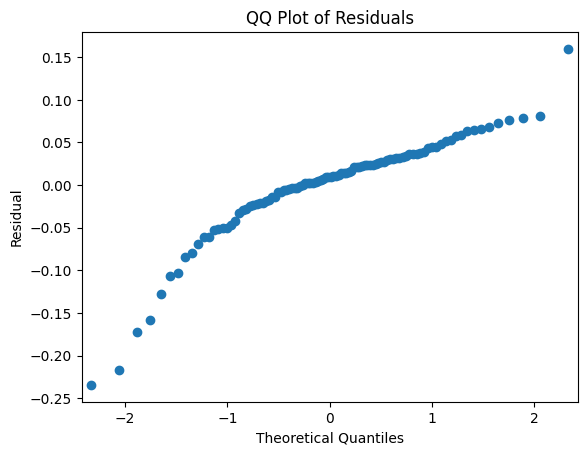

In [43]:
qqplot(residuals.reshape((-1,)))
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual')
plt.show();

**The QQ plot shows that residuals are slightly deviating from the straight diagonal.**

# Model performance evaluation

In [44]:
def model_evaluation(y_actual, y_forecast, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    k = len(model.coef_)
  else:
    k = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
  r2_adj = np.round(1 - ((1-r2)*(n-1)/(n-k-1)),2)
  return print(f"MAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nR2 Adjusted: {r2_adj}")

In [45]:
y_pred = results.predict(x_train)
model_evaluation(y_train.values, y_pred, model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.83
R2 Adjusted: 0.83


In [46]:
y_pred = results.predict(x_test)
model_evaluation(y_test.values,y_pred,model)

MAE: 0.04
RMSE: 0.06
R2 Score: 0.8
R2 Adjusted: 0.78


- The absolute difference between the actual and predicted values of the chance of admission is 0.04
- The root of the squared difference between the actual and predicted values is 0.06
- The R2 Score of 0.8 means that our model captures 80% variance in the data
- R2 Adjusted is an extension of R2 which is 0.78

# Actionable Insights & Recommendations

- Exam scores have a strong positive correlation with chance of admission and they are highly correlated amongst themselves.
- The model coefficients show that CGPA is the most significant predictor variable while University Rating are the least significant.
- The distribution of target variable is left-skewed.
- The categorical variables such as university ranking, research,SOP and LOR increases chances of admission.
- Other than multicolinearity, the predictor variables have met the conditions required for Linear Regression.

## Recommendations

- Could try adding more independent features that are not related to the exam so that the data will fit the model even better.

Note: you may need to restart the kernel to use updated packages.
